## Filtrado por sujeto con eventos 
Se busca que los datos de No_events sean acordes a los sujetos que sí tienen eventos, de esta manera también se valida que no haya desbalanceo de datos 

In [72]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\lauri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [73]:
# import pyedflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import openpyxl
import shutil
import random

In [85]:
directorio_actual=os.getcwd()
archivos_1=os.listdir(directorio_actual+"/dataset/Non_Events/non_event_batch_1/")
archivos_2=os.listdir(directorio_actual+"/dataset/Non_Events/non_event_batch_2/")

eventos_oa = os.listdir(directorio_actual+"/Datos_Modelo/Events/oa")
eventos_ca = os.listdir(directorio_actual+"/Datos_Modelo/Events/ca")

print(archivos_1)
print(archivos_2)

print(len(archivos_1))
print(len(archivos_2))

print(eventos_oa)
print(eventos_ca)
print(len(eventos_oa))
print(len(eventos_ca))

eventos=eventos_ca+eventos_oa
print(f'Eventos ',eventos)
print(len(eventos))

['S1_p10_Stagen1_Event101_Session1.csv', 'S1_p10_Stagen1_Event103_Session1.csv', 'S1_p10_Stagen1_Event188_Session1.csv', 'S1_p10_Stagen1_Event189_Session1.csv', 'S1_p10_Stagen1_Event190_Session1.csv', 'S1_p10_Stagen1_Event215_Session1.csv', 'S1_p10_Stagen1_Event222_Session1.csv', 'S1_p10_Stagen1_Event225_Session1.csv', 'S1_p10_Stagen1_Event226_Session1.csv', 'S1_p10_Stagen1_Event228_Session1.csv', 'S1_p10_Stagen1_Event229_Session1.csv', 'S1_p10_Stagen1_Event230_Session1.csv', 'S1_p10_Stagen1_Event232_Session1.csv', 'S1_p10_Stagen1_Event233_Session1.csv', 'S1_p10_Stagen1_Event234_Session1.csv', 'S1_p10_Stagen1_Event238_Session1.csv', 'S1_p10_Stagen1_Event239_Session1.csv', 'S1_p10_Stagen1_Event242_Session1.csv', 'S1_p10_Stagen1_Event83_Session1.csv', 'S1_p10_Stagen1_Event88_Session1.csv', 'S1_p10_Stagen1_Event89_Session1.csv', 'S1_p10_Stagen1_Event90_Session1.csv', 'S1_p10_Stagen1_Event91_Session1.csv', 'S1_p10_Stagen1_Event93_Session1.csv', 'S1_p10_Stagen1_Event99_Session1.csv', 'S1_p1

# Prueba de cortar solo algunos canales 

In [76]:
# !pip install mne

# import mne

In [86]:
csv_path = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Events\ca\S1_p1_1_Stagen1_Event1_Session1.csv'
path_sano = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Non_Events\non_event_batch_1\S1_p1_Stagen1_Event10_Session1.csv'

df = pd.read_csv(csv_path)
print(df.head())


     LOC-A2    ROC-A1     F3-A2     C3-A2     O1-A2     F4-A1     C4-A1  \
0 -2.026017 -0.693904 -2.372396 -0.654231  0.368124 -0.815976  0.507744   
1 -1.120394 -1.163882 -0.812924  0.519188  1.343175 -0.328450  0.838102   
2  0.263600 -1.005188  0.758755  1.608682  0.744259 -1.065461 -0.738155   
3  0.178912  1.865797  0.731289 -0.045396 -0.038529  1.853590  1.698711   
4 -0.693141  1.492714 -0.995270 -1.667430 -0.777066  0.642786  0.201038   

      O2-A1        X1        X2        X3        X4        X5        X6  \
0  1.369116  1.780041  2.913939 -0.248157 -0.067979 -3.894163  0.492439   
1  1.589609  0.195727  0.827054 -0.072007 -0.083085  0.252140  0.579355   
2 -0.476463 -0.275868 -1.716503  0.005356  0.021653  0.812451  0.666758   
3  0.252918 -0.420737 -0.096910  0.152941  0.087114 -0.476265  0.697520   
4  1.625467 -0.685817  0.009293 -0.001785  0.153582 -0.775097  0.697520   

         DC3        X7         X8       SaO2         DC8  
0  13.153735  7.629236 -10.770718  96.4

In [87]:
df_sano = pd.read_csv(path_sano)
print(df_sano.head())

     LOC-A2    ROC-A1     F3-A2     C3-A2     O1-A2     F4-A1     C4-A1  \
0  0.571832  0.252918  0.696956  0.389487 -0.173571  0.617609  0.671015   
1  1.162356  0.243000  1.526284  0.163653 -0.841154 -0.105669 -0.812924   
2 -0.012589  0.053788  1.051728 -0.506218 -1.572824  0.236896  0.101854   
3  0.658045 -0.833524  1.995499  1.604868  0.529107 -0.574884 -0.767147   
4 -0.232319  0.361257 -0.830472 -0.931182  0.561913 -0.196460 -0.381857   

      O2-A1        X1        X2        X3        X4        X5        X6  \
0 -0.887694  2.097520 -0.638544  0.105333 -0.011582  2.997665 -2.594034   
1 -1.528573 -2.451987 -1.838636  0.066056 -0.038773  0.177432 -1.794217   
2 -0.725948  1.302281 -1.095216  0.151751  0.086107  0.121401 -1.040299   
3 -1.515602  0.571771  0.136736  0.048203  0.170703 -0.345525 -0.307378   
4  0.507744  1.259129 -6.397391  0.118425 -0.075029 -0.849805  0.338628   

         DC3        X7         X8      SaO2         DC8  
0  74.417121 -5.622797 -90.841520  98.46

15.0


Text(0, 0.5, 'Amplitude')

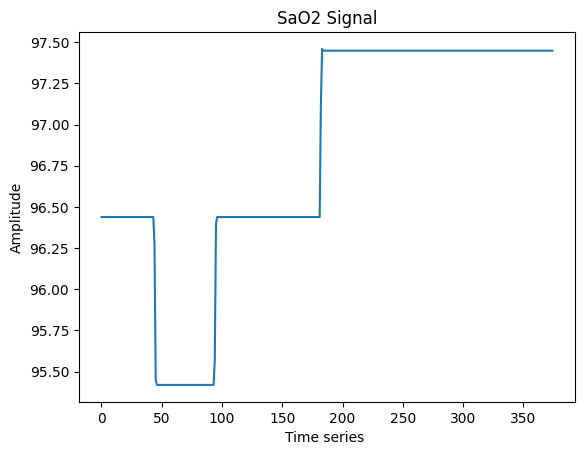

In [88]:
canal='SaO2'
# len(df[canal])
print(len(df[canal])*(1/25))

df[canal].plot( )
plt.title(f'{canal} Signal')
plt.xlabel('Time series ')
plt.ylabel('Amplitude')

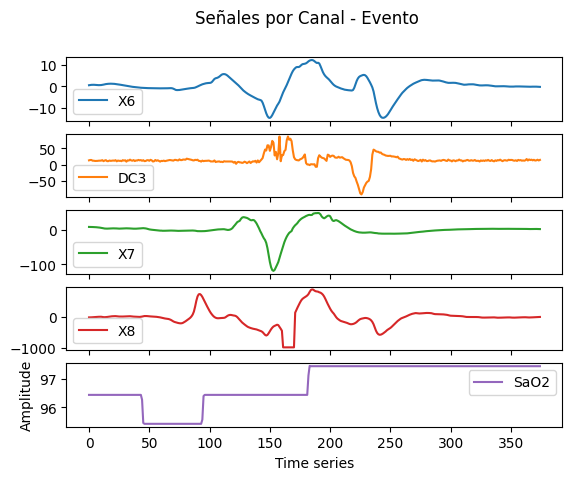

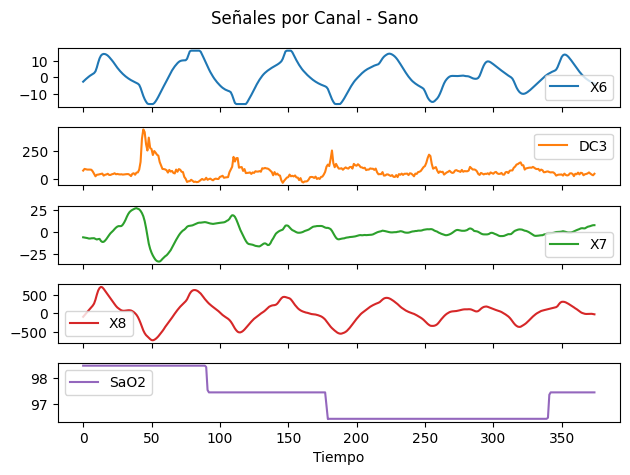

In [89]:
canales=['X6','DC3','X7','X8','SaO2']
df_canales = df[canales]
df_canales.plot(subplots=True)
plt.suptitle('Señales por Canal - Evento')
plt.xlabel('Time series')   
plt.ylabel('Amplitude')

# Figura para sanos
df_sano[canales].plot(subplots=True)
plt.suptitle('Señales por Canal - Sano')
plt.xlabel('Tiempo')
plt.tight_layout()
plt.show()


In [81]:
print(df_canales)

           X6        DC3        X7         X8       SaO2
0    0.492439  13.153735  7.629236 -10.770718  96.438544
1    0.579355  14.218814  7.438560 -10.591455  96.438544
2    0.666758  14.218814  7.390890  -8.470176  96.438544
3    0.697520  12.067353  7.343221  -5.333074  96.438544
4    0.697520  12.067353  7.247883  -1.688060  96.438544
..        ...        ...       ...        ...        ...
370 -0.184329  12.621195  1.718257  -4.167864  97.448692
371 -0.184329  13.153735  1.765927  -0.731991  97.448692
372 -0.204837  15.028275  1.718257   1.568551  97.448692
373 -0.235599  12.876814  1.622919   2.195972  97.448692
374 -0.286870  14.495735  1.432242   3.450813  97.448692

[375 rows x 5 columns]


In [ ]:
csv_path = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Events\ca'
path_sano = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Non_Events\non_event_batch_1'


path_destino_eventos=r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca'
path_destino_noeventos=r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events'

# Recorremos cada archivo en la carpeta - Eventos
for nombre_archivo in os.listdir(csv_path):
    print(f"Procesando archivo: {nombre_archivo}")
    if nombre_archivo.endswith('.csv'):
        ruta_original = os.path.join(csv_path, nombre_archivo)

        # Cargar el archivo CSV
        try:
            df = pd.read_csv(ruta_original)
            # print(df.head())

            df.columns = df.columns.str.strip()  # Eliminar espacios

            # Filtrar solo los canales deseados (verifica que existan en el DataFrame)
            canales_existentes = [c for c in canales if c in df.columns]
            
            print(f"Canales existentes en {nombre_archivo}: {canales_existentes}")

            df_filtrado = df[canales_existentes]
            # print(df_filtrado.head())

            # Construir nuevo nombre
            nombre_base, extension = os.path.splitext(nombre_archivo)
            nuevo_nombre = f"{nombre_base}_modelo{extension}"
            ruta_salida = os.path.join(path_destino_eventos, nuevo_nombre)

            # Guardar nuevo CSV
            df_filtrado.to_csv(ruta_salida)
            print(f"✔️ Guardado: {ruta_salida}")
        
        except Exception as e:
            print(f"❌ Error procesando {nombre_archivo}: {e}")


Procesando archivo: S1_p100_1_Stagen1_Event1_Session1.csv
Canales existentes en S1_p100_1_Stagen1_Event1_Session1.csv: ['X6', 'X7', 'X8']
          X6           X7          X8
0 -26.259739  1635.135119 -350.560342
1 -17.936980  1589.503441 -139.908446
2  -9.614221  1522.921370  292.301030
3  -5.022354  1454.043366  736.564157
4  -2.439429  1242.817487  967.305470
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca\S1_p100_1_Stagen1_Event1_Session1_modelo.csv
Procesando archivo: S1_p100_1_Stagen1_Event2_Session1.csv
Canales existentes en S1_p100_1_Stagen1_Event2_Session1.csv: ['X6', 'X7', 'X8']
          X6         X7         X8
0 -67.873533 -11.623163  33.721523
1 -64.142641 -11.049180  36.017456
2 -60.698741 -11.336172  35.730465
3 -57.254841  -9.901213  33.721523
4 -54.097932  -6.170321  32.573556
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca\S1_p100_1_Stagen1_Event2_Session1_modelo.csv
Procesando archivo: S1_p100_1_Stagen1_

In [100]:
# Recorremos cada archivo en la carpeta - Eventos
for nombre_archivo in os.listdir(path_sano):
    if nombre_archivo.endswith('.csv'):
        ruta_original = os.path.join(path_sano, nombre_archivo)

        # Cargar el archivo CSV
        try:
            df = pd.read_csv(ruta_original)
            df.columns = df.columns.str.strip()  # Eliminar espacios
            # Filtrar solo los canales deseados (verifica que existan en el DataFrame)
            canales_existentes = [c for c in canales if c in df.columns]
            df_filtrado = df[canales]

            # Construir nuevo nombre
            nombre_base, extension = os.path.splitext(nombre_archivo)
            nuevo_nombre = f"{nombre_base}_modelo{extension}"
            ruta_salida = os.path.join(path_destino_noeventos, nuevo_nombre)

            # Guardar nuevo CSV
            df_filtrado.to_csv(ruta_salida, index=False)
            print(f"✔️ Guardado: {ruta_salida}")
        
        except Exception as e:
            print(f"❌ Error procesando {nombre_archivo}: {e}")

✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event101_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event103_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event188_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event189_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event190_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event215_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event222_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event225_Session1_modelo.csv
✔️ Guardado: C:\

In [102]:
ca=os.listdir(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca')
oa=os.listdir(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\oa')
sano=os.listdir(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events')

print(f'Eventos CA: {len(ca)}')
print(f'Eventos OA: {len(oa)}') 
print(f'Eventos totales: {len(ca)+len(oa)}')
print(f'Eventos Sano: {len(sano)}') 

datos_sanos = random.sample(sano, len(ca)+len(oa))  # sin repetición
print(datos_sanos)
print(f'Eventos sanos / cortados : {len(datos_sanos)}')

Eventos CA: 362
Eventos OA: 1374
Eventos totales: 1736
Eventos Sano: 12952
['S1_p1_Stagew_Event136_Session1_modelo.csv', 'S1_p22_Stagew_Event120_Session1_modelo.csv', 'S1_p33_Stagew_Event132_Session1_modelo.csv', 'S1_p43_Stagen1_Event118_Session1_modelo.csv', 'S1_p36_Stagew_Event45_Session1_modelo.csv', 'S1_p9_Stagen3_Event179_Session1_modelo.csv', 'S1_p18_Stagew_Event179_Session1_modelo.csv', 'S1_p39_Stagen3_Event202_Session1_modelo.csv', 'S1_p40_Stagew_Event82_Session1_modelo.csv', 'S1_p47_Stagew_Event16_Session1_modelo.csv', 'S1_p33_Stagew_Event99_Session1_modelo.csv', 'S1_p32_Stagen3_Event77_Session1_modelo.csv', 'S1_p1_Stagen2_Event21_Session1_modelo.csv', 'S1_p29_Stagew_Event24_Session1_modelo.csv', 'S1_p18_Stagew_Event5_Session1_modelo.csv', 'S1_p5_Stagew_Event108_Session1_modelo.csv', 'S1_p3_Stager_Event247_Session1_modelo.csv', 'S1_p19_Stagew_Event250_Session1_modelo.csv', 'S1_p24_Stagen2_Event216_Session1_modelo.csv', 'S1_p47_Stagew_Event201_Session1_modelo.csv', 'S1_p14_Stag

In [ ]:
destino_sanos_cortados=r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_corte'

for nombre_archivo in datos_sanos:
    ruta_origen = os.path.join(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events', nombre_archivo)
    ruta_destino = os.path.join(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_corte', nombre_archivo)

    if os.path.exists(ruta_origen):
        shutil.copy(ruta_origen, ruta_destino)
        print(f"✔️ Copiado: {nombre_archivo}")
    else:
        print(f"⚠️ No encontrado: {nombre_archivo}")



✔️ Copiado: S1_p1_Stagew_Event136_Session1_modelo.csv
✔️ Copiado: S1_p22_Stagew_Event120_Session1_modelo.csv
✔️ Copiado: S1_p33_Stagew_Event132_Session1_modelo.csv
✔️ Copiado: S1_p43_Stagen1_Event118_Session1_modelo.csv
✔️ Copiado: S1_p36_Stagew_Event45_Session1_modelo.csv
✔️ Copiado: S1_p9_Stagen3_Event179_Session1_modelo.csv
✔️ Copiado: S1_p18_Stagew_Event179_Session1_modelo.csv
✔️ Copiado: S1_p39_Stagen3_Event202_Session1_modelo.csv
✔️ Copiado: S1_p40_Stagew_Event82_Session1_modelo.csv
✔️ Copiado: S1_p47_Stagew_Event16_Session1_modelo.csv
✔️ Copiado: S1_p33_Stagew_Event99_Session1_modelo.csv
✔️ Copiado: S1_p32_Stagen3_Event77_Session1_modelo.csv
✔️ Copiado: S1_p1_Stagen2_Event21_Session1_modelo.csv
✔️ Copiado: S1_p29_Stagew_Event24_Session1_modelo.csv
✔️ Copiado: S1_p18_Stagew_Event5_Session1_modelo.csv
✔️ Copiado: S1_p5_Stagew_Event108_Session1_modelo.csv
✔️ Copiado: S1_p3_Stager_Event247_Session1_modelo.csv
✔️ Copiado: S1_p19_Stagew_Event250_Session1_modelo.csv
✔️ Copiado: S1_p24_

In [105]:
len_sanos_cortados = len(os.listdir(destino_sanos_cortados))
print(f'Cantidad de eventos sanos cortados: {len_sanos_cortados}')

Cantidad de eventos sanos cortados: 1736


In [106]:
df_show = pd.read_csv(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca\S1_p1_1_Stagen1_Event18_Session1_modelo.csv')
df_show

,Unnamed: 0,X6,DC3,X7,X8,SaO2
0,0,-14.283665,67.366293,-142.000000,-398.845212,98.469520
1,1,-12.950637,126.946853,-142.000000,-294.245258,98.469520
2,2,-11.586847,194.472908,-142.000000,-208.258778,98.469520
3,3,-10.202548,243.466575,-142.000000,-139.571176,98.469520
4,4,-8.818250,264.320836,-142.000000,-83.880140,98.469520
...,...,...,...,...,...,...
370,370,-0.615000,-233.880858,-3.334676,-8.051896,95.419242
371,371,-0.645762,-114.719738,0.049836,-5.900740,95.419242
372,372,-0.666270,19.970245,4.006378,-5.422705,95.419242
373,373,-0.666270,77.612360,8.677958,-4.645899,95.419242
